# TP Perceptron multicouche

Objectifs du TP :
– découvrir l’apprentissage par perceptron multi-couches
– utiliser scikit-learn pour déterminer une architecture MLP performante pour un jeu de données

### 1.1 MLP sous sklearn

### 1.2 La classe MLPClassifier : mise en pratique

Ce modèle optimise la fonction entropie croisée en utilisant le solveur LBFGS ou la descente de
gradient stochastique ...

### 1.2.1 Prise en main du modèle

Soit le jeu de données S = {([0, 0], 0),([0, 1], 1)}. Nous cherchons à apprendre un modèle
f(x) : R2 ! {0, 1} qui, à chaque exemple, associe une sortie booléenne. Créez ce jeu de
données (X et y) en utilisant les tableaux de numpy


In [142]:
X = [[0, 0], [0, 1]] 
y = [0, 1]

Créez un modèle MLP de classification avec une couche cachée de 4 neurones : dessinez ce modèle sur feuille, créez le avec MLPClassifier, puis apprenez le avec S, et testez le avec les entrées [2.,2.], puis [-1.,-2.].

In [144]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes = (4), activation='logistic',random_state =0) 

In [145]:
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=4, random_state=0,
              solver='lbfgs')

In [146]:
clf.predict([[2.,2.]])

array([1])

In [147]:
clf.predict([[-1.,-2.]])

array([0])

 A l’aide des coecients appris, complétez le dessin du MLP et vérifiez la sortie manuellement.

In [150]:
intercept = clf.intercepts_
print(clf.coefs_[0])
print(clf.coefs_[1])
print ("Biais: ", intercept)

[[-0.00817612 -0.03604359 -0.01721256 -0.0075178 ]
 [ 4.02907946  4.54042845 -4.36647093  2.19227334]]
[[ 4.43970473]
 [ 6.42911055]
 [-6.50556033]
 [ 1.75916981]]
Biais:  [array([-2.00849856, -2.08611154,  2.48127787, -1.65075374]), array([-2.72235326])]


    Complétez S en ajoutant les exemples ([1, 1], 0) et ([1, 0], 1). Il s’agit du problème du XOR.
    Apprenez les deux réseaux dont l’architecture a été présentée en cours avec des perceptrons
    linéaires à seuil. Les prédictions des réseaux obtenus sont-elles correctes ? Quels sont les
    coecients et biais obtenus ?

In [158]:
X = [[0, 0], [0, 1],[1,1],[1,0]] 
y = [0, 1, 0, 1]
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes = (4), activation='logistic',random_state =0)
clf.fit(X, y)
predictons = clf.predict([[2.,2.],[-1.,-2.]])
intercept = clf.intercepts_
print(f"predictons   = {predictons}\n")
print(f"coefficients = {clf.coefs_[0]}\n {clf.coefs_[1]}\n")
print(f"biais = {intercept}\n")

predictons   = [0 1]

coefficients = [[-5.59003315  4.28744275  6.63501236  0.25480379]
 [ 6.66529983  3.88553006 -4.66393444 -0.61281728]]
 [[-13.84256542]
 [  4.97626697]
 [-13.89507944]
 [  0.78475093]]

biais = [array([ 2.91299768, -1.06892002,  1.94670147, -4.45072613]), array([16.3974844])]



**graphe**

Oui, les prédictions des réseaux obtenus sont correctes. 


    Soit S' = {([0, 0], [0, 1]),([1, 1], [1, 1])}. Nous cherchons à apprendre un mod`ele f(x) : R2 !
    {0, 1}2 qui, à chaque exemple, associe deux sorties booléennes distinctes. Au vu de S', quelles
    sont les deux fonctions booléennes que nous cherchons à apprendre ? Créez ce jeu de données
    (X et y) en utilisant les tableaux de numpy.

In [153]:
X = [[0, 0],[1, 1]]
Y = [[0, 1],[1, 1]]
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes = (4), activation='logistic',random_state =0) 
clf.fit(X, Y)
predictons = clf.predict([[2.,2.],[-1.,-2.]])
intercept = clf.intercepts_
print(f"predictons   = {predictons}\n")
print(f"coefficients = {clf.coefs_[0]}\n")
print(f"biais = {intercept}\n")

predictons   = [[1 1]
 [0 1]]

coefficients = [[ 0.33719617 -2.37912862 -2.4980991   2.6014669 ]
 [ 0.325494   -2.38560763 -2.51354284  2.63390062]]

biais = [array([ 1.77479554,  2.26297151,  2.44486328, -2.60767218]), array([ 1.43517424, 10.4392375 ])]



Et ensuite, les deux fonctions booléennes que nous cherchons à apprendre sont : 


### 1.2.2 Travail sur le jeu de données Iris

In [168]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

Avant de construire le modèle, séparons le jeu de données en deux : 70% pour l’apprentissage, 30% pour le test.

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

    2. Apprendre cinq modèles de classification des données Iris, avec des réseaux qui ont respectivement de 1 à 5 couches cachées, et des tailles de couches entre 10 et 300 au choix. Quelles
    sont les performances en taux de bonne classification et en temps d’apprentissage obtenus
    pour chaque modèle ?

In [134]:
import random
import time
from sklearn.metrics import accuracy_score
for i in range(1,6):
    hidden_layer_sizes = []
    for j in range(i):
        hidden_layer_sizes.append(random.randint(10,300))
    hidden_layer_sizes = tuple(hidden_layer_sizes)
    clf = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes) 
    start = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'Modèle numéro {i}\n ayant {i} couches cachées de tailles: {hidden_layer_sizes}\n Temps d’apprentissage de : {time.time() - start}\n et une Accuarcy de  : {accuracy_score(y_test, y_pred)}')

Modèle numéro 1
 ayant 1 couches cachées de tailles: (45,)
 Temps d’apprentissage de : 0.03276205062866211
 et une Accuarcy de  : 0.7111111111111111
Modèle numéro 2
 ayant 2 couches cachées de tailles: (22, 35)
 Temps d’apprentissage de : 0.04384493827819824
 et une Accuarcy de  : 0.8888888888888888
Modèle numéro 3
 ayant 3 couches cachées de tailles: (68, 176, 73)
 Temps d’apprentissage de : 0.49938511848449707
 et une Accuarcy de  : 0.9777777777777777
Modèle numéro 4
 ayant 4 couches cachées de tailles: (282, 143, 44, 245)
 Temps d’apprentissage de : 0.5489070415496826
 et une Accuarcy de  : 0.9777777777777777
Modèle numéro 5
 ayant 5 couches cachées de tailles: (180, 125, 156, 138, 28)
 Temps d’apprentissage de : 0.2564563751220703
 et une Accuarcy de  : 0.9777777777777777


Comparer les résultats avec une classifieur à noyau de type SVM avec noyaux polynomial :

In [125]:
from sklearn import svm
clsvm = svm.SVC(kernel='poly')
clsvm.fit(X_train, y_train)
clsvm.score(X_test, y_test)

0.9777777777777777

Déterminez, pour chaque attribut d’entrées, sa valeur moyenne et l’écart-type de sa distribution.
Une astuce classique lorsque l’on programme des réseaux de neurones, est de précéder l’apprentissage
du modèle par la normalisation des valeurs d’entrées. Le principe est de ramener toutes les entrées
dans un même intervalle fermé, tout en respectant les distributions de probabilités de ces entrées. Ce
processus de normalisation permet de considérer toutes ces valeurs à égale importance. Attention,
la normalisation doit se faire autant sur les données d’apprentissage que sur les données de test.

In [169]:
import statistics
Ls = statistics.mean(X[:,0])
ls = statistics.mean(X[:,1])
Lp = statistics.mean(X[:,2])
lp = statistics.mean(X[:,3])
print(f"la longueur moyenne des sépales est :{Ls}\n")
print(f"la largeur moyenne des sépales est :{ls}\n")
print(f"la longueur moyenne des pétales est :{Lp}\n")
print(f"la largeur moyenne des pétales est :{lp}\n")

la longueur moyenne des sépales est :5.843333333333334

la largeur moyenne des sépales est :3.0573333333333332

la longueur moyenne des pétales est :3.758

la largeur moyenne des pétales est :1.1993333333333334



In [170]:
import statistics
Ls = statistics.stdev(X[:,0])
ls = statistics.stdev(X[:,1])
Lp = statistics.stdev(X[:,2])
lp = statistics.stdev(X[:,3])
print(f"Ecart-type de la longueur  des sépales est :{Ls}\n")
print(f"Ecart-type de la largeur  des sépales est :{ls}\n")
print(f"Ecart-type de la longueur  des pétales est :{Lp}\n")
print(f"Ecart-type de la largeur  des pétales est :{lp}\n")

Ecart-type de la longueur  des sépales est :0.8280661279778629

Ecart-type de la largeur  des sépales est :0.4358662849366982

Ecart-type de la longueur  des pétales est :1.7652982332594664

Ecart-type de la largeur  des pétales est :0.7622376689603465



    1. Normaliser les données vers l’intervalle réel [0.,1.]. Cela peut se faire par quelques lignes
    de programmation, colonne par colonne de la matrice d’entrée, ou en utilisant la classe
    StandardScaler du package preprocessing. Voici un exemple d’utilisation issu de la documentation de sklearn :

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

    2. Re-apprendre et tester les cinq modèles MLP et le SVM après avoir normalisé les données en
    entrées. Observez-vous des améliorations ?

In [139]:
hidden_layer_sizes = (45,)
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes)
mlp. fit(X_train_scaler, y_train)
y_pred = mlp.predict(X_test_scaler)
print(f'Modèle {hidden_layer_sizes}\n Accuarcy : {accuracy_score(y_test, y_pred)}')


hidden_layer_sizes = (22, 35)
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes)
mlp. fit(X_train_scaler, y_train)
y_pred = mlp.predict(X_test_scaler)
print(f'Modèle {hidden_layer_sizes}\n Accuarcy : {accuracy_score(y_test, y_pred)}')


hidden_layer_sizes = (68, 176, 73)
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes)
mlp. fit(X_train_scaler, y_train)
y_pred = mlp.predict(X_test_scaler)
print(f'Modèle {hidden_layer_sizes}\n Accuarcy : {accuracy_score(y_test, y_pred)}')


hidden_layer_sizes = (282, 143, 44, 245)
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes)
mlp. fit(X_train_scaler, y_train)
y_pred = mlp.predict(X_test_scaler)
print(f'Modèle {hidden_layer_sizes}\n Accuarcy : {accuracy_score(y_test, y_pred)}')


hidden_layer_sizes = (180, 125, 156, 138, 28)
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes)
mlp. fit(X_train_scaler, y_train)
y_pred = mlp.predict(X_test_scaler)
print(f'Modèle {hidden_layer_sizes}\n Accuarcy : {accuracy_score(y_test, y_pred)}')



Modèle (45,)
 Accuarcy : 0.9111111111111111
Modèle (22, 35)
 Accuarcy : 0.9777777777777777
Modèle (68, 176, 73)
 Accuarcy : 0.9777777777777777
Modèle (282, 143, 44, 245)
 Accuarcy : 0.9777777777777777
Modèle (180, 125, 156, 138, 28)
 Accuarcy : 0.9777777777777777


In [140]:
from sklearn import svm
clsvm = svm.SVC(kernel='poly')
clsvm.fit(X_train_scaler, y_train)
clsvm.score(X_test_scaler, y_test)

0.8888888888888888

Pour terminer, nous allons maintenant étudier la convergence des algorithmes d’optimisation disponibles : L-BFGS, SGD et Adam. L’algorithme SGD permet notamment d’adapter le pas d’apprentissage lors de la descente du gradient (paramètre ⌫ dans la formulation mathématique). On
retrouve cette particularité avec le solveur Adam. Dans ces deux méthodes, la donnée du pas initial
peut alors s’avérer importante : learning rate init.

L’algorithme L-BFGS est, quant à lui, réputé pour converger rapidement vers une bonne solution
quand le jeu de données est relativement petit.

    1. Pour chacun des cinq modèles précédemment appris après normalisation, et pour chaque
    solveur disponible, indiquez : le temps de convergence, le nombre d’itérations pour converger, et les performances du modèle appris. Résumez ces informations au sein d’un tableau récapitulatif.

## 2 Travail sur le jeu de données MNIST

Il est possible de le charger sous sklearn avec l’instruction mns = fetch mldata(“MNIST original”)
du package datasets.

In [160]:
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


Commençons par visualiser les données

Commençons par visualiser les données Visualisons maintenant les images avec leurs labels.

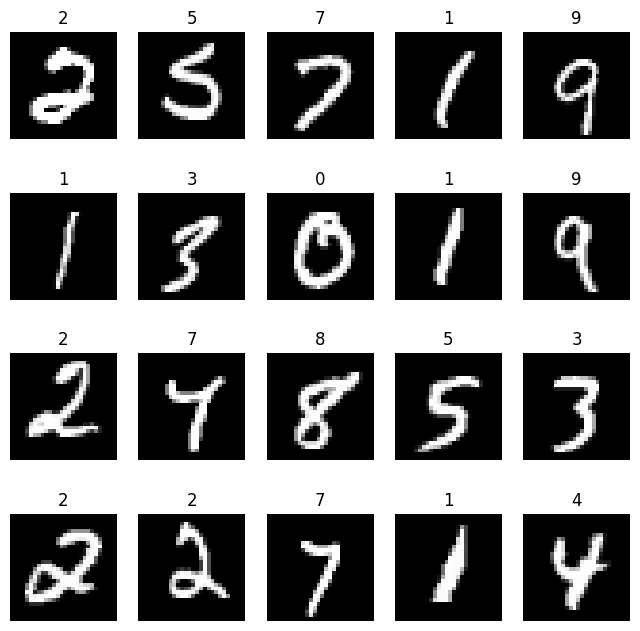

In [161]:
import matplotlib.pyplot as plt
import numpy as np
def plot_digits(img, y):
    cols = min(5, len(img))
    rows = len(img) // cols
    fig = plt.figure(figsize=(8,8))
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        plt.axis('off')
        plt.imshow(img[i], cmap = 'gray')
        ax.set_title(y[i])
    plt.show()

a = np.random.permutation(len(X))
a = a[:20]
plot_digits(X[a].reshape(-1, 28, 28), y[a])

Par la suite, les apprentissages se feront sur les 60000 premiers exemples, et
les tests se feront sur les exemples restants dans l’échantillon chargé. Il s’agit du protocole utilisé
par tous les chercheurs testant eurs algorithmes sur MNIST.

In [162]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

En faisant varier les différents hyper-paramètres du modèle, avec ou sans pre-processing, et en
utilisant une GridSearch, parvenez-vous à battre les quelques références ci-après ? Indiquez le temps
d’apprentissage du modèle et tous ses hyper-paramètres et paramètres.

### 0.5 Sans pre-processing

In [59]:
from sklearn.neural_network import MLPClassifier
import time
start = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print(f"Temps d’apprentissage du modèle : {time.time() - start}")

Temps d’apprentissage du modèle : 73.03856205940247


In [60]:
from sklearn.metrics import accuracy_score
y_pred = mlp.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')

Accuracy score : 0.9642


### 0.6 Avec pre-processing

Pour le pre-processing, nous allons standardiser les données :

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)
start = time.time()
mlp = MLPClassifier()
mlp. fit(X_train_scaler, y_train)
y_pred = mlp.predict(X_test_scaler)
print(f"Temps d’apprentissage du modèle : {time.time() - start}")
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')

Temps d’apprentissage du modèle : 52.315818309783936
Accuracy score : 0.974


### 0.7 GridSearch

In [78]:
start = time.time()
mlp = MLPClassifier(alpha=1e-6, hidden_layer_sizes= (500,),solver= 'adam')
mlp.fit(X_train, y_train)
print(f'Temps d’apprentissage du modèle : {time.time() - start}')

Temps d’apprentissage du modèle : 267.04816937446594


In [77]:
y_pred = mlp.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')

Accuracy score : 0.9764
